In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
df1 = pd.read_csv('../datasets/clustering/data.csv')
df = df1.copy()
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [5]:
df.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.3895505 , -0.91769495,  0.649105  , ...,  0.96048158,
         1.04529612,  0.68332274],
       [-0.6885438 , -0.45919476,  0.65432122, ..., -0.55294213,
         0.3554352 , -1.60267076],
       [ 0.80560694,  0.31875345, -1.16796258, ...,  0.97917134,
        -0.92625017, -2.22432704],
       ...,
       [-0.24988501, -0.46478181,  1.88458578, ...,  1.54422962,
         1.1855134 ,  0.57075203],
       [ 0.30932332,  2.17805293,  0.7613671 , ..., -1.08428749,
        -0.5474945 ,  0.10775421],
       [ 0.75184799,  0.56149   ,  1.45581708, ..., -0.63608329,
         1.00085474, -0.31416284]])

In [7]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(98000, 27)

In [8]:
df_pca

array([[-7.19058135e-01, -1.84284477e-02, -1.01489775e+00, ...,
        -2.83092471e-01, -1.71015243e+00, -2.31225835e-01],
       [-1.01209813e+00, -9.20653984e-01,  1.88684735e+00, ...,
        -2.88820943e-01, -2.54160666e-02,  7.67857388e-01],
       [-1.37061505e+00,  5.85541813e-01, -1.25720259e+00, ...,
        -2.24548162e+00,  1.41960080e+00, -8.17539989e-01],
       ...,
       [ 5.27246160e-01, -6.92976846e-01, -1.41440532e+00, ...,
         1.32667018e+00, -8.50737037e-01, -4.57939378e-01],
       [ 5.87352923e-01, -1.18654312e+00, -1.25014778e-03, ...,
        -2.76966073e-01,  8.49633227e-02, -4.24776376e-01],
       [-1.67504885e+00, -5.86344582e-01,  3.84392187e-02, ...,
        -1.27040866e-01, -1.21862235e-01,  1.42447148e+00]])

In [9]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.719058,-0.018428,-1.014898,-1.852300,0.826982,0.114979,0.576083,-0.833193,1.125217,1.774150,...,0.708038,-0.441667,-0.419596,0.564399,-0.989216,-0.252555,-0.696925,-0.283092,-1.710152,-0.231226
1,-1.012098,-0.920654,1.886847,1.260584,-0.212045,-1.256363,0.162246,-0.116176,-0.307030,1.164314,...,-0.281521,-0.514156,0.529182,0.276327,-1.077501,-0.753800,-1.168344,-0.288821,-0.025416,0.767857
2,-1.370615,0.585542,-1.257203,0.820805,-0.151678,-0.570685,0.676353,-0.316492,1.164202,1.284616,...,-0.007068,0.125229,-2.126750,0.019317,-1.061323,1.433495,1.260143,-2.245482,1.419601,-0.817540
3,1.218932,0.171315,0.230498,1.053605,0.578840,-0.287229,-0.876048,0.081418,-0.350356,-0.760648,...,-0.000508,1.295040,1.347752,0.792693,0.831598,-1.010158,1.031897,-0.185921,-0.304419,0.145491
4,-1.025793,-0.151604,1.437407,2.500153,-0.523530,-0.436372,-2.411039,-0.901765,0.105160,0.014072,...,0.802116,0.415776,-1.944199,0.078684,-0.815831,0.687043,1.144737,0.866386,-0.056802,-0.522505


# Modeling

Cari K optimal menggunakan metode elbow dengan algoritma kmeans

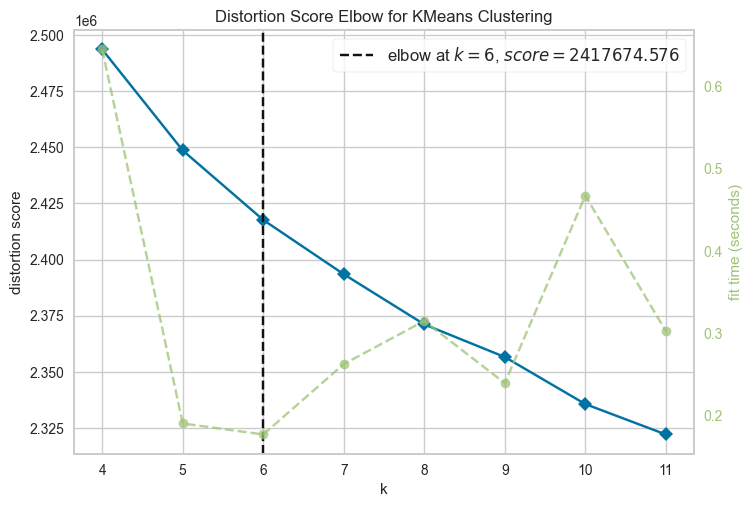

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pca)
visualizer.show()

In [ ]:
#KMeans
# km = KMeans(n_clusters=7)
# y = km.fit_predict(df_pca)

In [ ]:
#Hierarchical
# hag = AgglomerativeClustering(n_clusters=7)
# y = hag.fit_predict(df_pca)

In [13]:
#GMM
gmm = GaussianMixture(n_components = 6)
y = gmm.fit_predict(df_pca)

silhouette_avg = silhouette_score(df_pca, y)
print(f"Silhouette Score of K-Means: {silhouette_avg}")

davies_bouldin_avg = davies_bouldin_score(df_pca, y)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

calinski_harabasz_avg = calinski_harabasz_score(df_pca, y)
print(f"Calinski Harabasz: {calinski_harabasz_avg}")

In [ ]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
df1['Predicted']=y

In [ ]:
submission=df1.loc[:,['id','Predicted']]
submission.shape

(98000, 2)

In [ ]:
submission.head(100)

,id,Predicted
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
95,95,-1
96,96,-1
97,97,-1
98,98,-1


In [ ]:
submission.to_csv('submission_gmm.csv',index=False)